In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw03.ok')

Assignment: hw03
OK, version v1.12.5



In [2]:
!pip install --update networkx


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update


In [3]:
!pip install jassign

In [4]:
!pip install tqdm

In [5]:
from IPython.core.display import HTML
from datascience import *

import jassign
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx
from networkx.algorithms import bipartite


# Homework 03

## Small worlds

In this homework assignment, we're going to explore the concept of *small worlds*, which we discussed in class earlier this semester.  Small worlds have long been studied by social networks researchers, and they have also been discussed in popular culture. As a reminder, the rough idea is that social networks can typically be expected to have two characteristics:

* a high level of clustering
* a short average path length

A high level of clustering is consistent with the idea of triadic closure. And a short average path length is supposed to capture situations we often seem to encounter in our day to day lives: e.g., two strangers find that they have an unexpected acquaintance in common and exclaim "it's a small world!" (see the Milgram article below).

We're going to try to assess how well these two small world predictions hold up empirically. We're going to focus on the Add Health networks. We should bear in mind that the small world theory is really about very large networks, so we will be evaluating it in an unusual situation: networks of moderate size taken from children who all live in the same community.

In case you want to read some of the original small world research papers, you can check out some of the papers we talked about in lecture. Here is an article describing an early empirical study by Milgram:

* [Milgram 1967](http://measure.igpp.ucla.edu/GK12-SEE-LA/Lesson_Files_09/Tina_Wey/TW_social_networks_Milgram_1967_small_world_problem.pdf)

And here are a couple of more recent studies in which researchers analyzed mathematical models that can produce networks with small-world properties:

* [Watts & Strogatz 1998](http://www.nature.com/nature/journal/v393/n6684/abs/393440a0.html)
* [Watts 1999](http://www.jstor.org/stable/10.1086/210318?seq=1#page_scan_tab_contents)

This homework is a combination of the practices we did in the first half of the semester. Note that as you work on this homework assignment, **it is helpful to review the previous labs and homeworks for the functions we used for calculation, the code we used to store results in arrays and tables, and the protocols for statistical testing.**

First, we'll start by looking at this sample network: 

In [8]:
test_net = nx.Graph([(1,2), (1,3), (2,3), (4,5), (4,6), (4,3), (5,6), (3,5), (2,6), (7,8), (8,9)])
# nx.draw_circular(test_net, with_labels=True)


**Question 1** Copy and paste the table below in a new cell and fill it with the shortest distance between each pair of vertices. Enter INF if the nodes are disconnected  
  


| &nbsp;  | node 1 | node 2 | node 3 | node 4 | node 5 | node 6 | node 7 | node 8 | node 9 |
|  ------ | -----  | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
|  node 1 |   -    |  (?)   |   (?)  |    (?) |    (?) |    (?) |    (?) |    (?) |    (?) |
|  node 2 |   -    |  -     |   (?)  |    (?) |    (?) |    (?) |    (?) |    (?) |    (?) |
|  node 3 |   -    |  -     |   -    |    (?) |    (?) |    (?) |    (?) |    (?) |    (?) |
|  node 4 |   -    |  -     |   -    |   -    |    (?) |    (?) |    (?) |    (?) |    (?) |
|  node 5 |   -    |  -     |   -    |   -    |   -    |    (?) |    (?) |    (?) |    (?) |
|  node 6 |   -    |  -     |   -    |   -    |   -    |   -    |    (?) |    (?) |    (?) |
|  node 7 |   -    |  -     |   -    |   -    |   -    |   -    |   -    |    (?) |    (?) |
|  node 8 |   -    |  -     |   -    |   -    |   -    |   -    |   -    |   -    |    (?) |
|  node 9 |   -    |  -     |   -    |   -    |   -    |   -    |   -    |   -    |   -    |  
  
  
<!--
BEGIN QUESTION
name: q1
points: 5
manual: True
-->
<!-- EXPORT TO PDF -->

| &nbsp;  | node 1 | node 2 | node 3 | node 4 | node 5 | node 6 | node 7 | node 8 | node 9 |
|  ------ | -----  | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
|  node 1 |   -    |  1     |   1    |    2   |    2   |    2   |    INF |    INF |    INF |
|  node 2 |   -    |  -     |   1    |    2   |    2   |    1   |    INF |    INF |    INF |
|  node 3 |   -    |  -     |   -    |    1   |    1   |    2   |    INF |    INF |    INF |
|  node 4 |   -    |  -     |   -    |   -    |    1   |    1   |    INF |    INF |    INF |
|  node 5 |   -    |  -     |   -    |   -    |   -    |    1   |    INF |    INF |    INF |
|  node 6 |   -    |  -     |   -    |   -    |   -    |   -    |    INF |    INF |    INF |
|  node 7 |   -    |  -     |   -    |   -    |   -    |   -    |   -    |    1   |    2   |
|  node 8 |   -    |  -     |   -    |   -    |   -    |   -    |   -    |   -    |    1   |
|  node 9 |   -    |  -     |   -    |   -    |   -    |   -    |   -    |   -    |   -    |  

**Question 2** Now manually calculate the average shortest path length **for each** of the connected components in the network.
  
<!--
BEGIN QUESTION
name: q2
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

for the connected components contain (1, 2, 3, 4, 5, 6):
    the average shortest path is (21) / 15 = 1.4
    
for the connected components contain (nodes 7, 8, 9):
    the average shortest path is (4) / 3 = 1.333

**Question 3** Now verify the average shortest path length for each of the components in the graph, using the average_shortest_path_length method of the networkx library. For this purpose, one has to iterate over the connected components of the test_net graph.  
  
<!--
BEGIN QUESTION
name: q3
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [9]:
for component in nx.connected_component_subgraphs(test_net):
    
    print (nx.average_shortest_path_length(component)) # first ellipsis is for the function name, while the second one is for the arguments of the function
    

1.4
1.3333333333333333


For rest of this homework, we'll use the code that we used in the labs to read the Add Health networks in.
The loading will take a few seconds...

In [10]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("../..", "data", "add-health", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

number_add_health_networks = 84
add_health_networks = [read_add_health_network(x) for x in range(1,number_add_health_networks+1)]

As a first step in the analysis, we will create a helper function to calculate average degree of a network.

**Question 4** Fill in the definition of a helper function to calculate the average degree of the given network.

<!--
BEGIN QUESTION
name: q4
points: 2
manual: False
-->

In [11]:

def average_degree(net):
    return(2 * len(net.edges())/ len(net.nodes()))

avg_d=average_degree(test_net)
avg_d

2.4444444444444446

In [12]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



###  Empirical distribution in the Add Health networks

First, we'll look at the empirical distribution of clustering and average path length in the Add Health networks.

**Question 5** Write a loop that goes through each of the 84 Add Health networks and calculates the clustering coefficient and the number of nodes in the network. *(Please use the average clustering coefficient, implemented by the `average_clustering` function from the networkx package.) *

Store the results in a Table called `add_health_clustering` using columns called `num_nodes` and `avg_clustering_coef`.

<!--
BEGIN QUESTION
name: q5
points: 4
manual: False
-->

In [13]:
clustering = make_array()
num_nodes = make_array()

for g in add_health_networks:
    clustering = np.append(clustering, nx.average_clustering(g))
    num_nodes = np.append(num_nodes, len(g.nodes()))

add_health_clustering = Table().with_columns(['num_nodes', num_nodes,
                                              'avg_clustering_coef', clustering])
add_health_clustering

num_nodes,avg_clustering_coef
69,0.46781
105,0.327214
32,0.430558
281,0.221537
157,0.294993
108,0.327537
441,0.218287
204,0.272334
248,0.313195
678,0.23361


In [14]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6** Plot a histogram showing the distribution of clustering coefficients across the 84 Add Health networks.

<!--
BEGIN QUESTION
name: q6
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

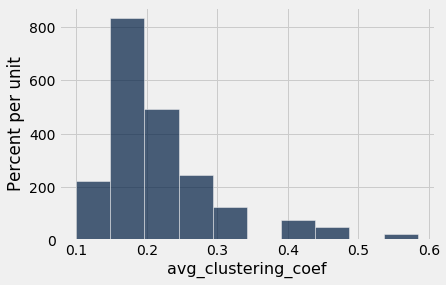

In [15]:
add_health_clustering.hist("avg_clustering_coef")

**Question 7** Make a scatter plot that compares the number of nodes in each network (x axis) to the clustering coefficient (y axis). Does it look like the clustering coefficient changes as the number of nodes does?

<!--
BEGIN QUESTION
name: q7
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

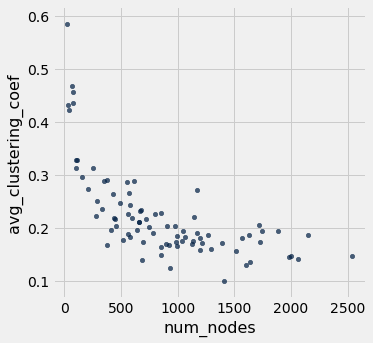

In [16]:
add_health_clustering.scatter("num_nodes", "avg_clustering_coef")
# It looks like the result when we was doing our test in ER model.(cc drops dramatically when num_nodes increase) 
# But this does not seem like a very accurate model of real social networks because in the real network the average 
# clustering coefficient is just decrease slowly when num_of_node is increasing.

###  Average path length of biggest component

Remember that it really only makes sense to think about the average path length between two nodes that are in the same component. (Nodes in different components have no path between them.) Since some of the Add Health networks have more than one component, we'll start by picking out only the largest component in each network.

In [17]:
# This might take a few seconds...
def get_biggest_component(network):
    biggest = max(nx.connected_component_subgraphs(network), key=len)
    return(biggest)

add_health_biggest_components = [get_biggest_component(g) for g in add_health_networks]

**Question 8** Write a loop that goes through the largest component of each of the 84 Add Health networks and calculates the average shortest path length and the number of nodes in the network. Store the results in a Table called `add_health_sp` using columns called `num_nodes` and `avg_shortest_path`.

<!--
BEGIN QUESTION
name: q8
points: 5
manual: False
-->

In [18]:
## NOTE: your code might take a little while
##       (~3-5 minutes) to run

avg_shortest_path = make_array()
num_nodes = make_array()

avg_degree = make_array()

for c in add_health_biggest_components:
    avg_shortest_path = np.append(avg_shortest_path, nx.average_shortest_path_length(c))
    num_nodes = np.append(num_nodes, len(c.nodes()))
    avg_degree = np.append(avg_degree, 2 * len(c.edges()) / len(c.nodes()))

add_health_sp = Table().with_columns(['num_nodes', num_nodes,
                                      'avg_shortest_path', avg_shortest_path,
                                      'avg_degree', avg_degree])

add_health_sp

num_nodes,avg_shortest_path,avg_degree
69,2.95524,6.37681
103,3.19417,6.75728
32,2.38508,5.6875
281,3.36398,8.08541
157,2.84828,9.29936
108,3.02648,7
437,3.86129,7.77117
204,3.36965,7.93137
248,3.43268,8.09677
678,4.13973,8.24484


In [19]:
ok.grade("q8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 9** Plot a histogram showing the distribution of average shortest path lengths across the 84 Add Health networks' largest components.  
<!--
BEGIN QUESTION
name: q9
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

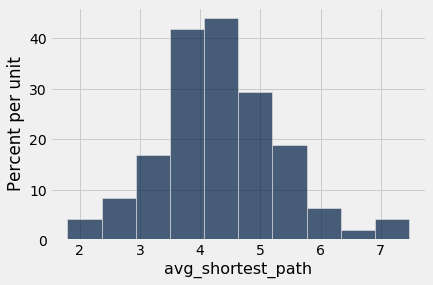

In [18]:
add_health_sp.hist("avg_shortest_path")

**Question 10** Make a scatter plot that compares the number of nodes in each largest component (x axis) to the average shortest path (y axis). Does it look like the average shortest path changes as the number of nodes does? 

[Make a plot, then answer the question as a comment]

<!--
BEGIN QUESTION
name: q10
points: 4
manual: True
-->
<!-- EXPORT TO PDF -->

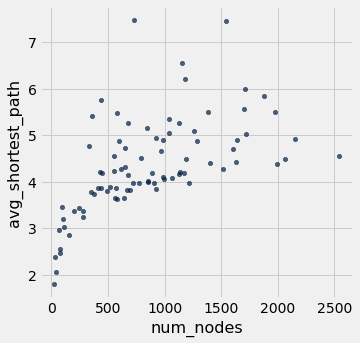

In [19]:
add_health_sp.scatter("num_nodes", "avg_shortest_path")

# In general, It makes sense. The average shortest path is just increasing slowly as the number of node increasing, 
# This is also showing us What we called small world phenomenon. But from the scatter we can also find that there are 
# still lots of points have a certain deviation from our expectations. Maybe It's because the noisy of the real social \
# network.

### P-values

In the introduction to this section, you read that the small world theory suggests that a social network should have a large clustering coefficient and a small average path length. But what do large and small mean? In other words, what should we think about comparing these networks to?

We'll use Erdos-Renyi random networks as a null model. Specifically, we're going to

* pick one specific Add Health network to test
* generate ER networks that 'match' that specific Add Health network
* compare the clustering coefficient / average path lengths of the ER networks to the ones we observe in the Add Health network


Let's pick out one particular Add Health network to focus on for this part.

In [34]:
# the specific Add Health network we'll look at
ahn = add_health_networks[17]

... and let's also use a couple of functions that we created in the ER lecture notebook:

In [35]:
def er_by_degree(n, avg_degree):
    """
    Create an Erdos-Renyi random network using the parameterization
    based on n, the number of nodes; and avg_degree, the expected degree
    """
    return(nx.erdos_renyi_graph(n=n, p=avg_degree / (n-1)))

def rand_er_network(network):
    """
    Return a random network generated from the ER model using
    the degree sequence of the network passed in
    """
    network_n = network.number_of_nodes()
    network_dbar = average_degree(network)
    return(er_by_degree(network_n, network_dbar)) # generate a new random network based on the n and dbar of the input network

### Developing a simulation from a null model

**Question 11** Write a function which, given a network, returns its average shortest path length. If the network has more than one component, your function should return the average path length in the biggest component.  

<!--
BEGIN QUESTION
name: q11
points: 3
manual: False
-->

In [36]:
def avg_path_length(net):
    if nx.number_connected_components(net) > 1:
        net = get_biggest_component(net)
    return(nx.average_shortest_path_length(net))    

In [37]:
ok.grade("q11");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 12** Write a simulation that generates 100 Erdos Renyi random networks that match the Add Health network `ahn`. (By 'match', we mean that the ER network should have the same average degree and number of nodes as the Add Health network `ahn`.). For each generated ER network, calculate the average clustering and use the function you wrote above to calculate the average path length. Store the results in a table called `er_res`.

<!--
BEGIN QUESTION
name: q12
points: 5
manual: False
-->

In [39]:
# Running the code will take about 1 min...
import random
random.seed(1111)

# calculate the average path length and average clustering coefficient for the observed network ahn.
observed_apl = avg_path_length(ahn) 
observed_cc = nx.average_clustering(ahn)

# then start to generate ER networks based on the observed network, 
# and store the cc and apl of the generated networks in arrays that build into a table
er_cc = make_array()
er_apl = make_array()

# the underscore (_) means that we don't
# care which iteration is which -- we just want
# to repeat this 100 times
for _ in range(100):
 
    er_net = rand_er_network(ahn)
    er_cc = np.append(er_cc, nx.average_clustering(get_biggest_component(er_net)))
    er_apl = np.append(er_apl, nx.average_shortest_path_length(get_biggest_component(er_net)))    
    
er_res = Table().with_columns('cc', er_cc,
                              'apl', er_apl)

er_res

cc,apl
0.0239806,2.90108
0.0264495,2.93428
0.0295912,2.81847
0.0323136,2.86503
0.0276704,2.91106
0.0233145,2.94428
0.0416625,2.89412
0.0311262,2.84139
0.0357873,2.85876
0.0300286,2.88638


In [40]:
ok.grade("q12");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now let's print out the observed average path length in the Add Health network `ahn` and plot a histogram of the average path lengths in the ER networks you just simulated.

The observed average path length is: 3.251828995172448


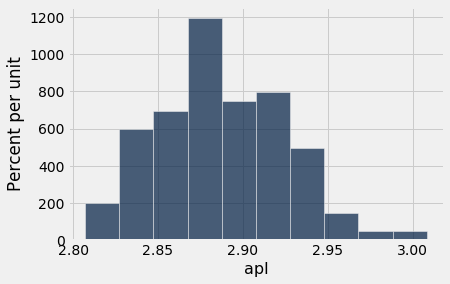

In [28]:
print("The observed average path length is:", observed_apl)
er_res.hist('apl')

**Question 13** Where would the observed Add Health network's statistic fall in the Erdos Renyi networks' distribution?  
<!--
BEGIN QUESTION
name: q13
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

The observed Add Health network's average path length is very large compared to matched ER random model network.

It would fall in the largest part (the most right part) in the histgram above, I think. 

###  Calculating P values

**Note**: Questions 14 and 16 below ask you to calculate a $p$ value. The calculation is not especially tricky, but if you want to review $p$ values and hypothesis tests in general, you can check out these [slides from Data 8](https://docs.google.com/presentation/d/1SXmBC3B452sW1qerhQ-bjpoR58tmAz100yf6rj2D1iI/edit#slide=id.g210ec578e3_0_0).

**Comparing the Add Health average path length to the null model**

**Question 14** Now use your results to calculate a $p$ value for the hypothesis that the Add Health network's average path length was generated by the ER model; the alternative hypothesis should be that the Add Health network's average path length is longer than it would be in the ER model. 

<!--
BEGIN QUESTION
name: q14
points: 3
manual: False
-->

In [29]:
emp_p_value_apl=np.mean(er_res['apl'] < observed_apl) #fill in the condition corresponding to the alternative hypothesis

emp_p_value_apl


1.0

In [30]:
ok.grade("q14");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Comparing the Add Health average clustering coefficient to the null model**

Now let's print out the observed average clustering in the Add Health network `ahn` and plot a histogram of the average clusterings in the ER networks you just simulated. Be sure to observe where the observed Add Health network's statistic would fall in the ER distribution.

Observed average clustering coefficient: 0.24996827209114098


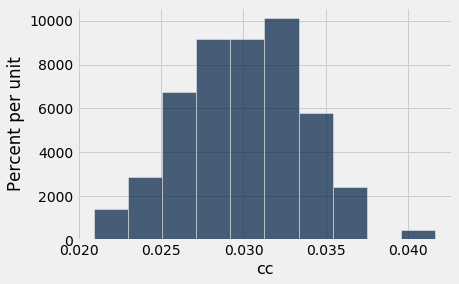

In [31]:
print("Observed average clustering coefficient:", observed_cc)
er_res.hist('cc')

**Question 15** Now use your results to calculate a $p$ value for the hypothesis that the Add Health network's average clustering was generated by the ER model; the alternative hypothesis should be that the Add Health network's average clustering is greater than it would be in the ER model.

<!--
BEGIN QUESTION
name: q15
points: 3
manual: False
-->

In [32]:
emp_p_value_cc = np.mean(er_res['cc'] > observed_cc) #fill in the condition corresponding to the alternative hypothesis
emp_p_value_cc

0.0

In [33]:
ok.grade("q15");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 16** What do these two $p$ values lead you to conclude about the agreement between the ER model and the small world hypothesis (at least, using information from the Add Health network)?

<!--
BEGIN QUESTION
name: q16
points: 4
manual: True
-->
<!-- EXPORT TO PDF -->

The p value former which is about the average path length shows that the chance of the observed statistic in ADD Health network is just in the direction of the alternative. It means that the Add Health network is extremely impossible to generated by the ER model.

The p value which is about the average clustering shows that the chance of the observed statistic in ADD Health network is just in the direction of the original hypothisis which means that the Add health network is likely to be generated by the ER model. 


# SUBMIT YOUR ASSIGNMENT

In [41]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

In order to submit your assignment, run the next cell.

You can submit as many times as you want (up to the deadline, 11:59 pm on Tuesday, Aug 6th).

In [42]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw03.ipynb', 'hw03.pdf')
ok.submit()

Generating PDF...
Saved hw03.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw03.ipynb'.
Submit... 100% complete
Submission successful for user: ziqiyuan123@berkeley.edu
URL: https://okpy.org/cal/demog180/su19/hw03/submissions/XLKw3A

